In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%matplotlib inline

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('train.csv')
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [3]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(categorical_features=[0])

In [4]:
df_test = pd.read_csv('test.csv')

In [5]:
X_test_2 = df_test[['TP_SEXO', 'SG_UF_RESIDENCIA', 'CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA',
                    'TP_NACIONALIDADE', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 
                    'IN_BAIXA_VISAO', 'IN_SURDEZ', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
                    'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                    'TP_LINGUA', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
                    'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]
X_test_2['Q027'].fillna('A', inplace=True)
for i in range(21, 29):
    X_test_2.iloc[:, i] = label_encoder.fit_transform(label_encoder.fit_transform(X_test_2.iloc[:, i]))
X_test_2.iloc[:, 0] = label_encoder.fit_transform(X_test_2.iloc[:, 0])
X_test_2.iloc[:, 1] = label_encoder.fit_transform(X_test_2.iloc[:, 1])
X_test_2.fillna(0.0, inplace=True)

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=down

In [6]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [7]:
notas = df['NU_NOTA_MT']
notas.fillna(0.0, inplace=True)

In [8]:
notas = pd.to_numeric(notas, errors='coerce').fillna(0.0)

In [9]:
X = df[['TP_SEXO', 'SG_UF_RESIDENCIA', 'CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_COR_RACA',
                    'TP_NACIONALIDADE', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 
                    'IN_BAIXA_VISAO', 'IN_SURDEZ', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
                    'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                    'TP_LINGUA', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
                    'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]
X['Q027'].fillna('A', inplace=True)
for i in range(21, 29):
    X.iloc[:, i] = label_encoder.fit_transform(label_encoder.fit_transform(X.iloc[:, i]))
X.fillna(0.0, inplace=True)
X.iloc[:, 0] = label_encoder.fit_transform(X.iloc[:, 0])
X.iloc[:, 1] = label_encoder.fit_transform(X.iloc[:, 1])

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=down

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, notas, test_size=0.3, random_state=101)

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
test_predictions = lm.predict(X_test)
test_predictions

array([421.30516004, 476.19708011, 458.0153182 , ..., 458.94141588,
       -14.78130941, 419.49237635])

In [14]:
predictions = lm.predict(X_test_2)
predictions

array([416.52835762, 449.42482799, 563.76395914, ..., 615.72981525,
       479.81823165,   7.90258181])

In [15]:
metrics.r2_score(y_test, test_predictions)

0.9181398065985726

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


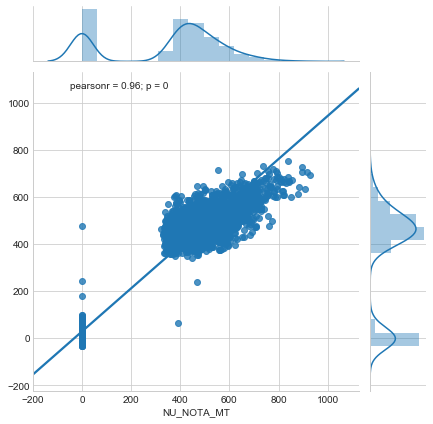

In [16]:
sns.set_style('whitegrid')
sns.jointplot(x=y_test, y=test_predictions, data=df, kind='reg')

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


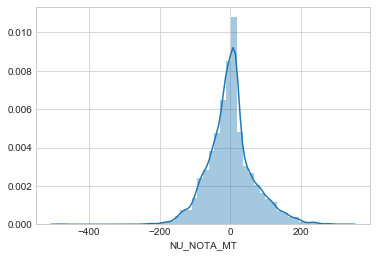

In [17]:
sns.distplot((y_test-test_predictions), bins=50)

In [18]:
df_inscr = pd.DataFrame(df_test['NU_INSCRICAO'], columns=['NU_INSCRICAO'])
df_predictions = pd.DataFrame(predictions, columns=['NU_NOTA_MT'])
answer = pd.concat([df_inscr, df_predictions], axis=1)
answer.to_csv('answer.csv', columns=['NU_INSCRICAO', 'NU_NOTA_MT'], index_label=False, index=False)
x = pd.read_csv('answer.csv')

In [19]:
x

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,416.528358
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,449.424828
2,b38a03232f43b11c9d0788abaf060f7366053b6d,563.763959
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,4.224854
4,715494628a50142ce8cb17191cfe6d0f3cae0934,566.578541
5,e656d6bad65c93fb2880f1eba5037008c8e75774,482.455393
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,560.667410
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,410.796295
8,043c544a2104aa8a9849f1a703a08d37a2f16839,467.293998
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,465.714720
